                              Anomaly detection: Credit Card Fraud Detection
                                    
                               

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('/home/pitzm/Dokumentumok/Data Science/Kaggle/CreditCardFraudDetection/creditcard.csv')

Features are result of a PCA transformation:

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The dataset is highly unbalanced:

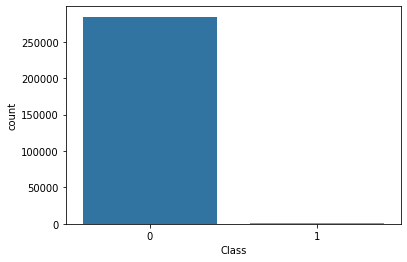

In [5]:
sns.countplot(df['Class'])

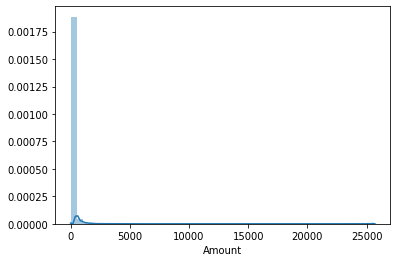

In [6]:
sns.distplot(df[df['Class']==0]['Amount'])

Amount and Time are the only original features:

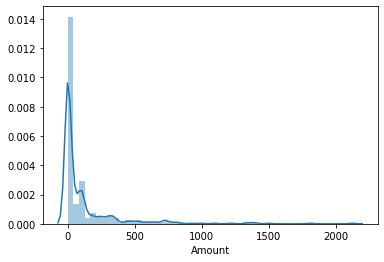

In [7]:
sns.distplot(df[df['Class']==1]['Amount'])

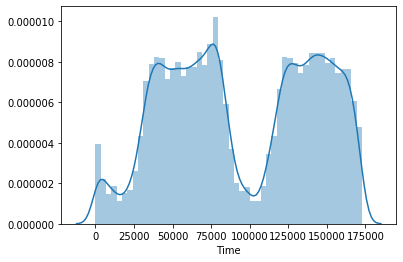

In [8]:
sns.distplot(df[df['Class']==0]['Time'])

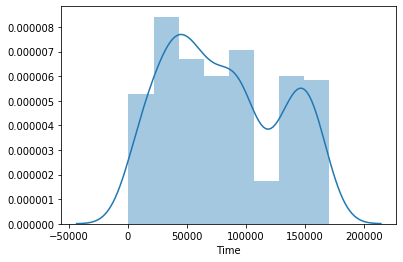

In [9]:
sns.distplot(df[df['Class']==1]['Time'])

Amount and Time need to be scaled:

In [10]:
from sklearn.preprocessing import RobustScaler

In [11]:
scaler=RobustScaler()

In [12]:
df['sc_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['sc_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

Splitting the data:

In [13]:
X = df.drop('Class', axis=1)
y = df['Class']



In [14]:
from sklearn.model_selection import train_test_split

original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

Creating a dataset with normal distribution for model selection:

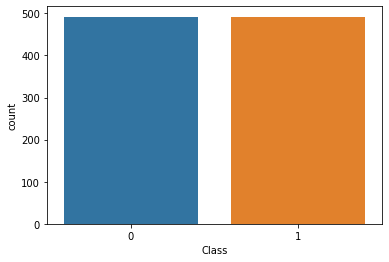

In [16]:
df = df.sample(frac=1)

fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

normal_df = normal_distributed_df.sample(frac=1, random_state=42)

sns.countplot(normal_df['Class'])

Building and testing models:

In [17]:
X = normal_df.drop('Class', axis=1)
y = normal_df['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    cross_val_sc = cross_val_score(classifier, X_train, y_train, cv=5)
    pred=classifier.predict(X_test)
    recall_sc=recall_score(pred, y_test, pos_label=0)
    print(classifier.__class__.__name__, "has an accuracy score of", round(cross_val_sc.mean(), 2) * 100, "%", "and a recall score of", round(recall_sc, 2)*100, "%")

LogisticRegression has an accuracy score of 95.0 % and a recall score of 91.0 %
KNeighborsClassifier has an accuracy score of 94.0 % and a recall score of 89.0 %
SVC has an accuracy score of 93.0 % and a recall score of 89.0 %
DecisionTreeClassifier has an accuracy score of 90.0 % and a recall score of 91.0 %
RandomForestClassifier has an accuracy score of 94.0 % and a recall score of 89.0 %


Training and testing the original data:

In [21]:
#model=LogisticRegression()

In [38]:
from sklearn.metrics import accuracy_score
#model.fit(original_Xtrain, original_ytrain)
#prediction=model.predict(original_Xtest)
acc_sc=accuracy_score(original_ytest, prediction)
recall_sc=recall_score(original_ytest, prediction)
print("Logistic Regression model has an accuracy score of", round(acc_sc, 2) * 100, "%", "and a recall score of", round(recall_sc, 2), "%")

Logistic Regression model has an accuracy score of 100.0 % and a recall score of 0.78 %


In [28]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(original_ytest, prediction)


print("Recall metric in the testing dataset: ", round(matrix[1,1]/(matrix[1,0]+matrix[1,1]), 2))


matrix

Recall metric in the testing dataset:  0.78


array([[56861,     3],
       [   22,    76]])

Techniques to detect anomalies:

In [31]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


In [32]:
isof=IsolationForest()
lof=LocalOutlierFactor()

In [ ]:

lof_pred = lof.fit_predict(original_Xtrain)
scores_pred=lof.negative_outlier_factor_
acc_sc=accuracy_score(original_ytest, lof_pred)
recall_sc=recall_score(original_ytest, lof_pred, average='macro')
print("LocalOutlierFactor model has an accuracy score of", round(acc_sc, 2) * 100, "%", "and a recall score of", round(recall_sc, 2)*100, "%")